In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import PCA

In [147]:
df = pd.read_csv('WineQT.csv')

In [148]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [149]:
df=df.drop(columns=['Id'])

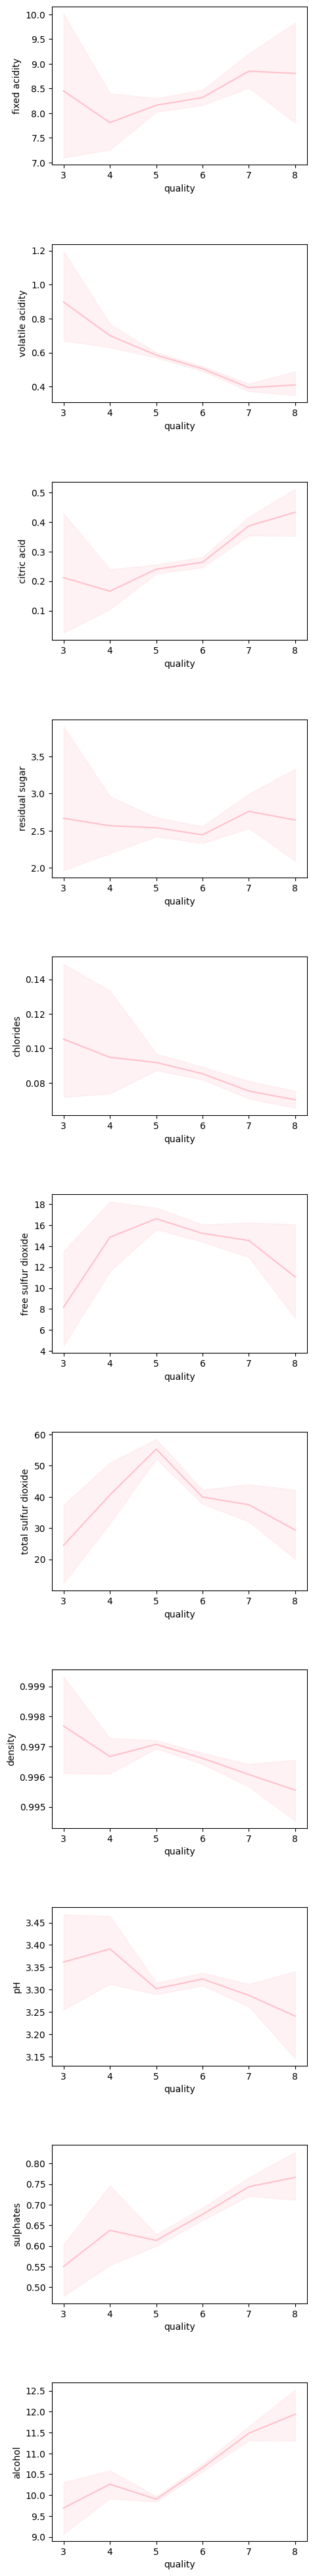

In [150]:
plot_columns = list(df.columns)
#plot_columns.remove('Id')
plot_columns.remove('quality')


fig, axs = plt.subplots(len(plot_columns),figsize=(5, 50))
fig.subplots_adjust(hspace = .5, wspace=.001)

#axs = axs.ravel()

for i in range(len(plot_columns)):

    sns.lineplot(ax = axs[i],data=df, x="quality",y=plot_columns[i], color = 'pink')

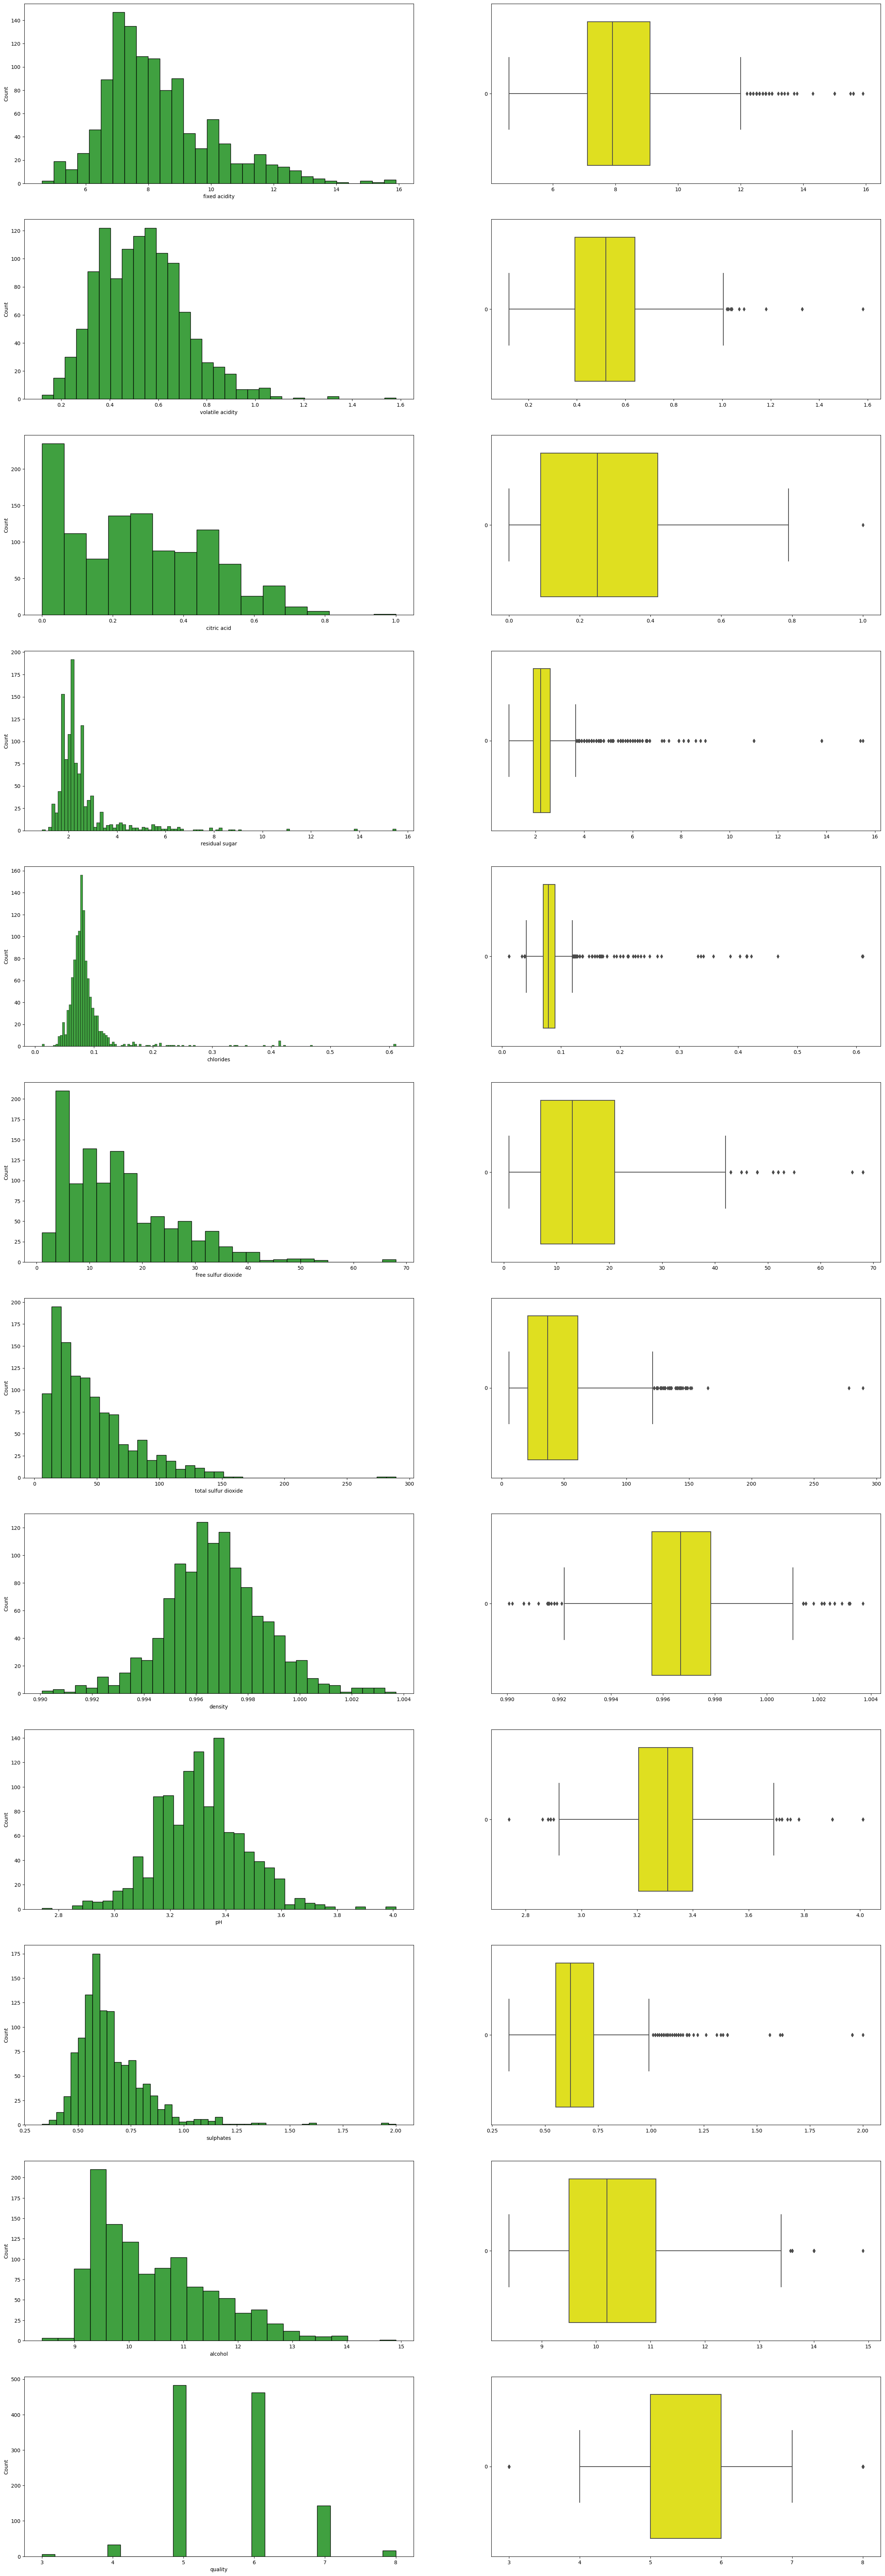

In [151]:
fig,ax = plt.subplots(12,2,figsize=(30,90))
for index,i in enumerate(df.columns):
    sns.histplot(df[i],ax=ax[index,0],color='green')
    sns.boxplot(df[i],ax=ax[index,1],color='yellow',orient="h")

# Normalizing the data

In [152]:
def get_outliers(df,column):
    three_sd = 3*(df[column].std())
    mean = df[column].sum()/len(df)
    max = mean + three_sd
    min = mean - three_sd
    vals = []
    for i in range(len(df)):
        val = df[column].iloc[i]
        if val > max:
            vals.append(val)
            #songs.at[i,column] = max
        elif val < min:
            vals.append(val)
            #songs.at[i,column] = min
    print(column, vals)

In [153]:
for column in df.columns:
    get_outliers(df,column)

fixed acidity [15.0, 15.0, 13.8, 13.7, 15.6, 14.3, 15.5, 15.6, 15.9]
volatile acidity [1.33, 1.33, 1.09, 1.58, 1.18]
citric acid [1.0]
residual sugar [7.3, 7.2, 11.0, 11.0, 7.9, 7.9, 6.7, 6.6, 15.5, 8.3, 7.9, 8.6, 7.5, 6.6, 9.0, 8.8, 8.1, 8.3, 8.3, 15.4, 13.8, 13.8, 6.7]
chlorides [0.341, 0.332, 0.467, 0.61, 0.27, 0.337, 0.263, 0.611, 0.358, 0.25, 0.422, 0.387, 0.415, 0.241, 0.414, 0.4029999999999999, 0.414, 0.415, 0.415, 0.235, 0.23]
free sulfur dioxide [68.0, 68.0, 53.0, 52.0, 51.0, 48.0, 48.0, 51.0, 52.0, 55.0, 48.0, 48.0, 66.0]
total sulfur dioxide [165.0, 151.0, 149.0, 147.0, 145.0, 148.0, 152.0, 278.0, 289.0, 147.0]
density [1.0032, 1.0026, 1.00315, 1.00315, 1.0026, 0.99064, 0.99064, 1.00289, 0.99007, 0.9902, 0.99084, 1.00369]
pH [3.9, 2.74, 3.9, 4.01, 4.01]
sulphates [1.56, 1.2, 1.95, 1.22, 1.95, 1.31, 2.0, 1.61, 1.26, 1.36, 1.36, 1.17, 1.62, 1.18, 1.34, 1.17, 1.17, 1.33, 1.18, 1.17, 1.17]
alcohol [14.0, 14.0, 14.0, 14.0, 14.9, 14.0, 14.0]
quality [3, 3, 3, 3, 3, 3]


In [154]:
def impute_outliers(df,column):
    three_sd = 3*(df[column].std())
    mean = df[column].sum()/len(df)
    max = mean + three_sd
    min = mean - three_sd
    #vals = []
    for i in range(len(df)):
        val = df[column].iloc[i]
        if val > max:
            df.at[i,column] = max
        elif val < min:
            df.at[i,column] = min
    #print(column, vals)

In [155]:
for column in df.columns:
    impute_outliers(df,column)

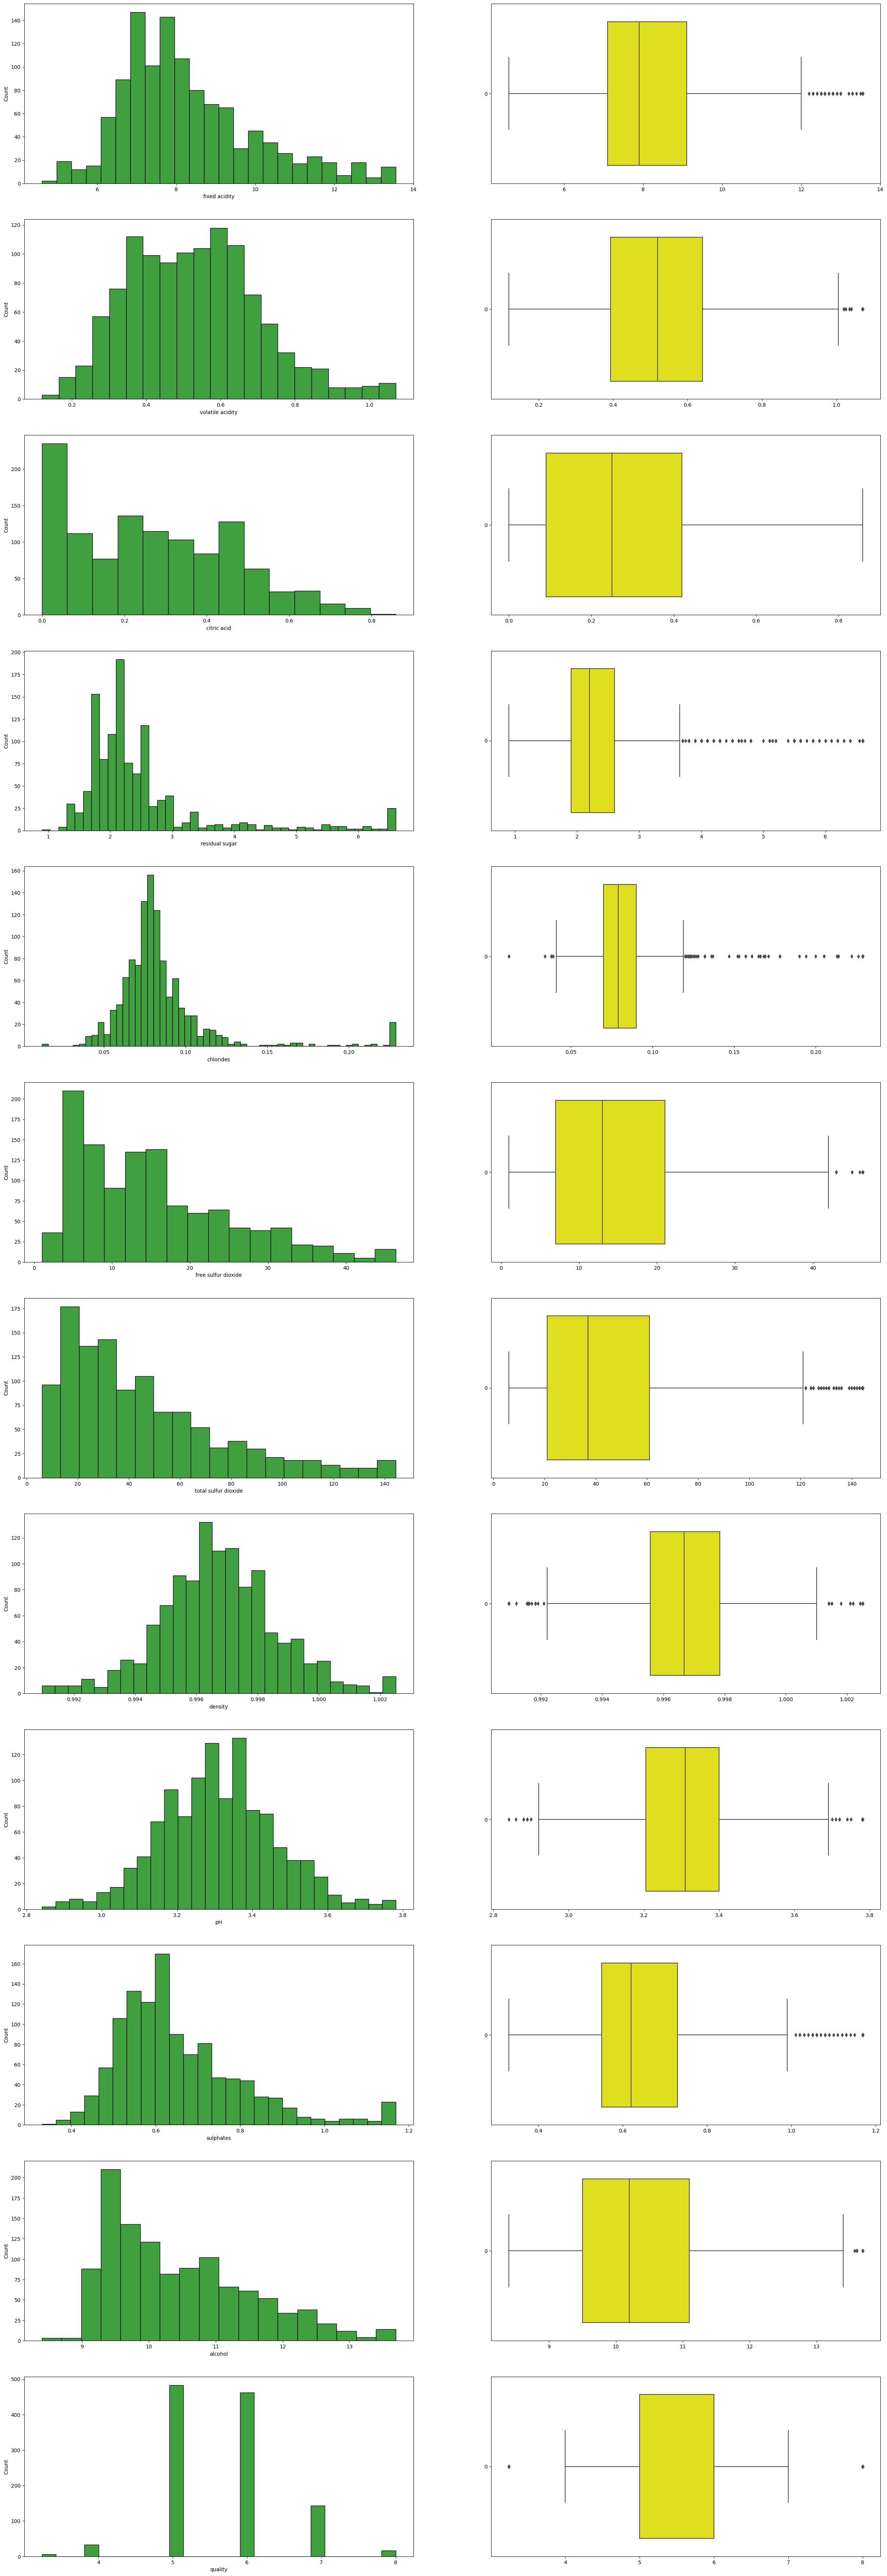

In [156]:
fig,ax = plt.subplots(12,2,figsize=(30,90))
for index,i in enumerate(df.columns):
    sns.histplot(df[i],ax=ax[index,0],color='green')
    sns.boxplot(df[i],ax=ax[index,1],color='yellow',orient="h")

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   float64
dtypes: float64(12)
memory usage: 107.3 KB


# Lin reg

In [158]:
X = df.copy()
X = X.drop(columns= 'quality')
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [159]:
y = df['quality'].copy()
y

0       5.0
1       5.0
2       5.0
3       6.0
4       5.0
       ... 
1138    6.0
1139    6.0
1140    5.0
1141    6.0
1142    5.0
Name: quality, Length: 1143, dtype: float64

In [160]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.25, random_state=0
)

In [161]:
reg = LinearRegression().fit(X_train, y_train)

In [162]:
guess = reg.predict(X_test)

Text(0, 0.5, 'Actual Values')

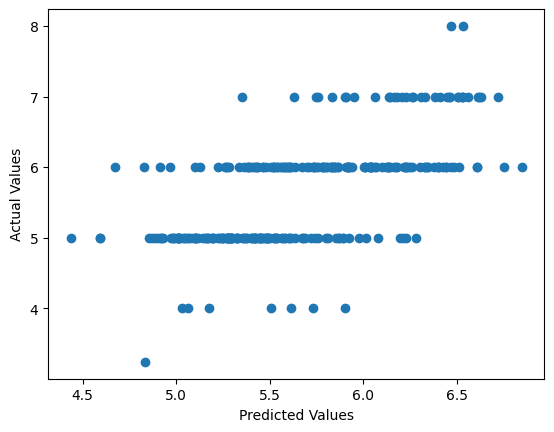

In [163]:
plt.scatter(x= guess, y= y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

Text(0, 0.5, 'Residual')

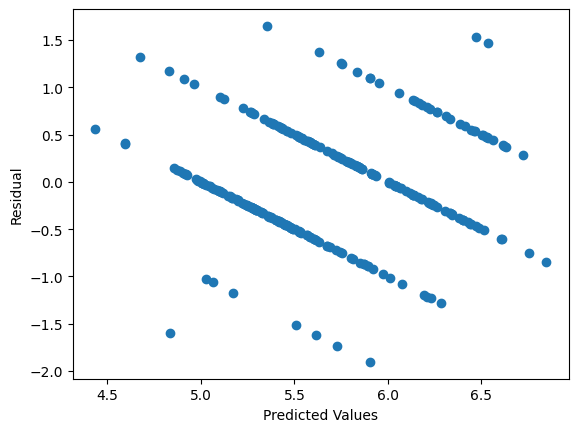

In [164]:
plt.scatter(x= guess, y= (y_test-guess))
plt.xlabel('Predicted Values')
plt.ylabel('Residual')

In [165]:
reg.score(X_test,y_test)


0.3955540627377866

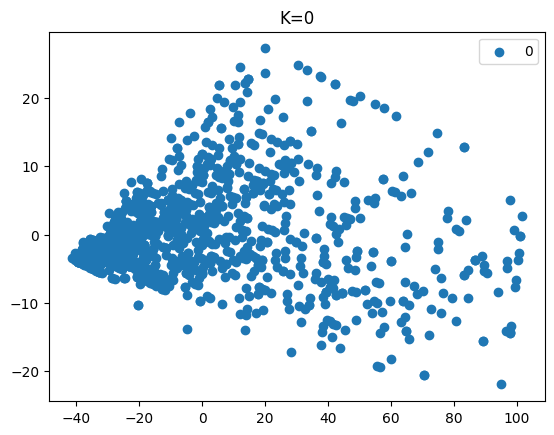

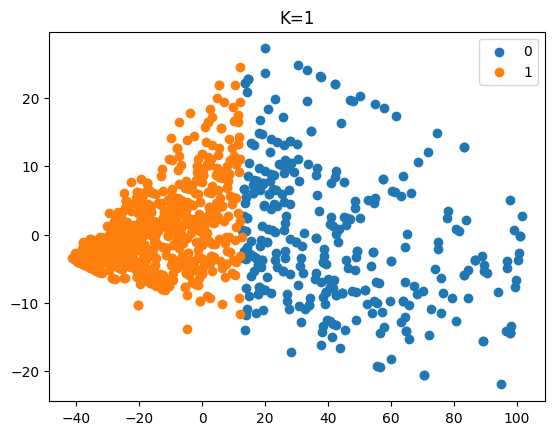

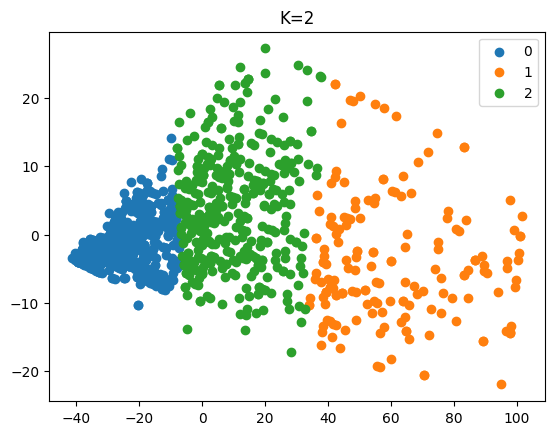

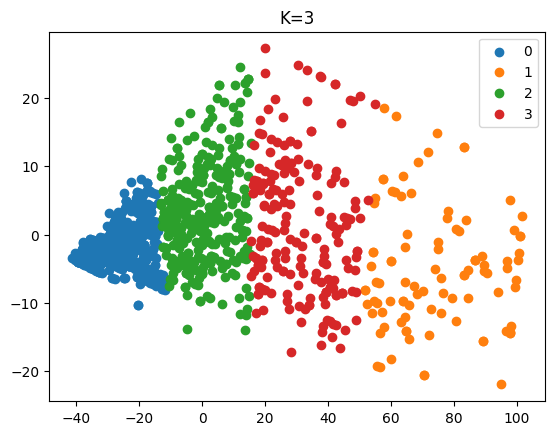

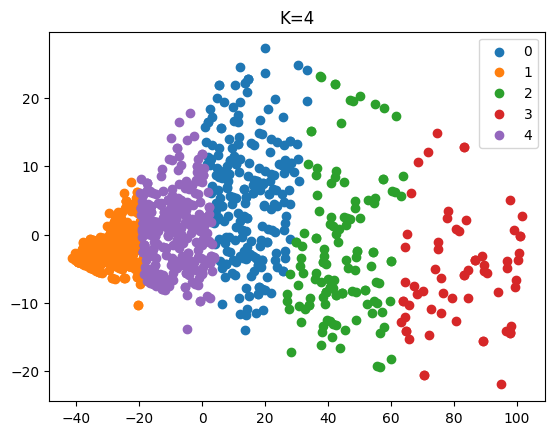

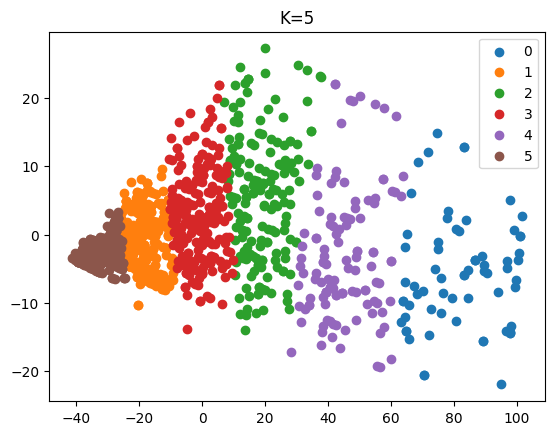

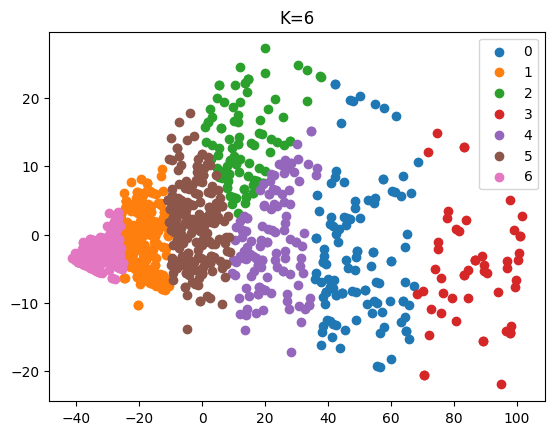

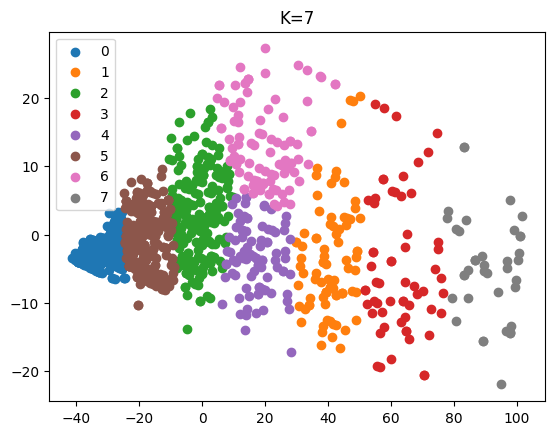

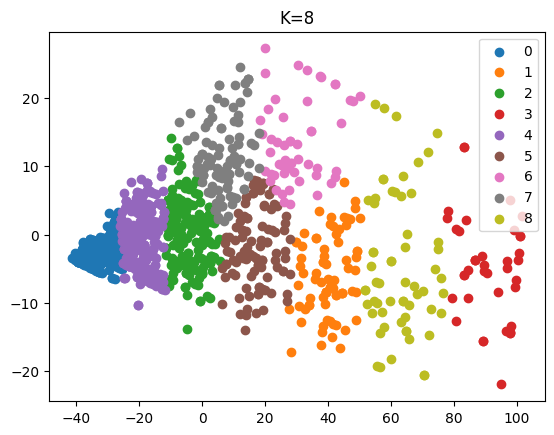

<function matplotlib.pyplot.show(close=None, block=None)>

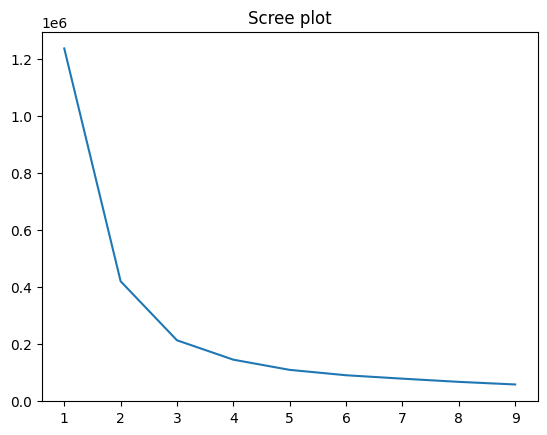

In [166]:
pca = PCA(2)
df = pca.fit_transform(df)

distortions = []
for  i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=0)
    label = kmeans.fit_predict(df)
    u_labels = np.unique(label)
    distortions.append(kmeans.inertia_)
    for i in u_labels:
        plt.scatter(df[label == i,0], df[label == i, 1], label = i)
    plt.title(f'K={i}')
    plt.legend()
    plt.show()

plt.plot(range(1,10),distortions)
plt.title('Scree plot')
plt.show